## Part 1 : Word Embedding 
##Visualization using TSNE word "Google"

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
import gensim.downloader as api

w2v = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [3]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    print(len(close_words))
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    print(" size of array: ",arrays.shape)
    # Reduces the dimensionality from 100 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress = True)
    
    Y = TSNE(n_components = 2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

#Random words

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


10
 size of array:  (26, 100)


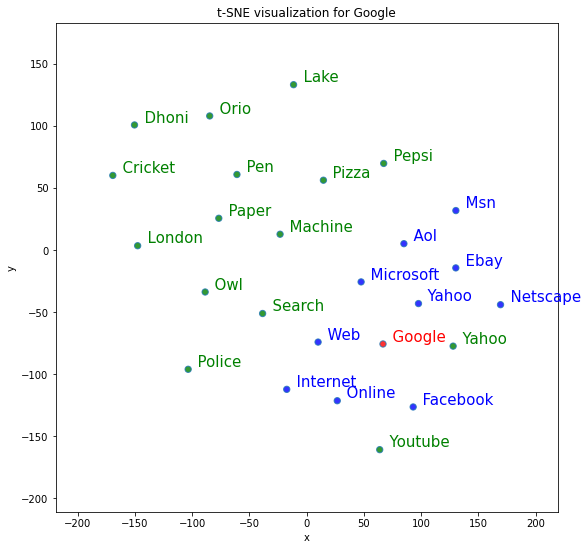

In [5]:
tsnescatterplot(w2v, 'google', 
                ['dhoni','cricket','pepsi','pizza','orio','london','lake',
                 'owl','paper','pen','police','yahoo','youtube','machine','search'])

#most similar and most dissimilar words of 'google

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


10
 size of array:  (21, 100)


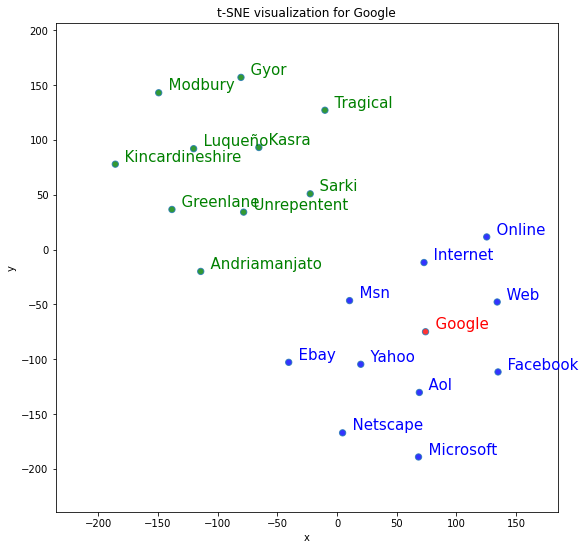

In [7]:
tsnescatterplot(w2v,'google', 
                [i[0] for i in w2v.wv.most_similar(negative=['google'])])

## **Part -2**  Text classification on Tweets-US-Airline dataset using Tfidf method and Logistic Regression model

In [11]:

data = pd.read_csv("/content/tweets")
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
X = data['text']
y = data['airline_sentiment']

In [13]:
print(X.shape)

(14640,)


In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
processed_tweets = []

for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)


In [16]:
tfidf = TfidfVectorizer(max_features=2000,min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X_tfidf_full = tfidf.fit_transform(processed_tweets).toarray()

X_tfidf_full.shape

(14640, 2000)

In [17]:
# spliting the full data to train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_tfidf_full, y, test_size=0.2)

In [18]:
X_train.shape

(11712, 2000)

In [29]:
# Fitting the training data on the logistic regression model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
predict_y = model.predict(X_test)


In [28]:
from sklearn.metrics import classification_report, accuracy_score
print("CLASSIFICATION REPORT : ",end="\n\n")
print(classification_report(y_test,predict_y))  
print("ACCURACY",end=" : ")
print(accuracy_score(y_test,predict_y))

CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1861
     neutral       0.62      0.53      0.57       569
    positive       0.81      0.59      0.68       498

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

ACCURACY : 0.787568306010929


## **Part -3** Summarizing sample text to 30 words

In [31]:
from gensim.summarization import summarize, keywords
from smart_open import smart_open
from pprint import pprint

text = " ".join((line for line in smart_open('black_holes.txt', encoding='utf-8')))

In [32]:
text

'A black hole is a place in space where gravity pulls so much that even light can not get out. The gravity is so strong because matter has been squeezed into a tiny space. This can happen when a star is dying.\n Because no light can get out, people can\'t see black holes. They are invisible. Space telescopes with special tools can help find black holes. The special tools can see how stars that are very close to black holes act differently than other stars.Black holes can be big or small. Scientists think the smallest black holes are as small as just one atom. These black holes are very tiny but have the mass of a large mountain. Mass is the amount of matter, or "stuff," in an object.Another kind of black hole is called "stellar." Its mass can be up to 20 times more than the mass of the sun. There may be many, many stellar mass black holes in Earth\'s galaxy. Earth\'s galaxy is called the Milky Way.The largest black holes are called "supermassive." These black holes have masses that are

In [33]:
# Summary of the paragraph

pprint(summarize(text,word_count=30))

('A supernova is an exploding star that blasts part of the star into '
 'space.Scientists think supermassive black holes were made at the same time '
 'as the galaxy they are in.A black hole can not be seen because strong '
 'gravity pulls all of the light into the middle of the black hole.')


In [34]:
# Important keywords from the paragraph

print(keywords(text))

scientists
star
stars
black hole
space
gravity
galaxy
holes
mass
masses
stellar
